In [1]:
from sympy import init_session
from sympy import div, QQ
from sympy.parsing.latex import parse_latex
from sympy.parsing.sympy_parser import parse_expr
from sympy.calculus.util import continuous_domain

from IPython.display import Markdown as md
from IPython.display import display
import pandas as pd

import numpy as np




init_session()

a, b, c, d = symbols('a b c d', real = True)
from docparts import añadir_ejercicios, doc_ejer, escribir_preambulo, escribir_ejercicios, escribir_fin

df_ejercicios = pd.DataFrame()

fichero = 'EVAUana'
titulo = 'EVAU - Análisis'
curso = '2BC'


x,y = symbols('x, y', real=True)

import matplotlib.pyplot as plt
from matplotlib import style
#style.use('ggplot')
style.use('seaborn-whitegrid')


%matplotlib inline


IPython console for SymPy 1.4 (Python 3.6.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



In [4]:
from sympy.calculus.util import continuous_domain, function_range


In [10]:
#
 
def asintotas(f) :
    # Igual usar singularities mejor: asintotas, verticales, horizontales y oblícuas (a,b) en oo y -oo
    asint = []
    asintex = r'Asíntotas:\\'
    asint.append([(i,limit(f,x,i)) for i in list(S.Reals - continuous_domain(f,x,domain=S.Reals))])
    asintex += ', '.join(r'$x='+str(i)+r'$\\' for i in list(S.Reals - continuous_domain(f,x,domain=S.Reals)))
    if abs(limit(f,x,oo)) != oo:
        asintex += r'$y='+latex(limit(f,x,oo))+r'$\\'
    if abs(limit(f,x,-oo)) != oo:
        asintex += r'$y='+latex(limit(f,x,-oo))+r'$\\'
  
    asint.append([(oo,limit(f,x,oo)), (-oo,limit(f,x,-oo))])
    oblicuas=[]
    if abs(limit(f/x,x,oo)) != oo :
        oblicuas.append((oo,limit(f/x,x,oo)*x+limit(f-limit(f/x,x,oo)*x,x,oo)))
        #display(latex(limit(f/x,x,oo)*x+limit(f-limit(f/x,x,oo)*x,x,oo)))
        asintex += r'$y='+latex(limit(f/x,x,oo)*x+limit(f-limit(f/x,x,oo)*x,x,oo))+r'$ \\'
    if abs(limit(f/x,x,-oo)) != oo :
        oblicuas.append((-oo,limit(f/x,x,-oo)*x+limit(f-limit(f/x,x,-oo)*x,x,-oo)))
        asintex += r'$y='+latex(limit(f/x,x,-oo)*x+limit(f-limit(f/x,x,-oo)*x,x,-oo))+r'$ \\'
    asint.append(oblicuas)
    return asint,asintex
        

Considere la función: $\frac{x + 1}{\sqrt{x^{2} + 1}} $

* (1 punto) Determine el dominio y las asíntotas de la función f (x) .
* (1 punto) Determine los máximos y mínimos relativos de la función f (x) .
* (1 punto) Determine la recta tangente a la función f (x) en el punto x = 2 .


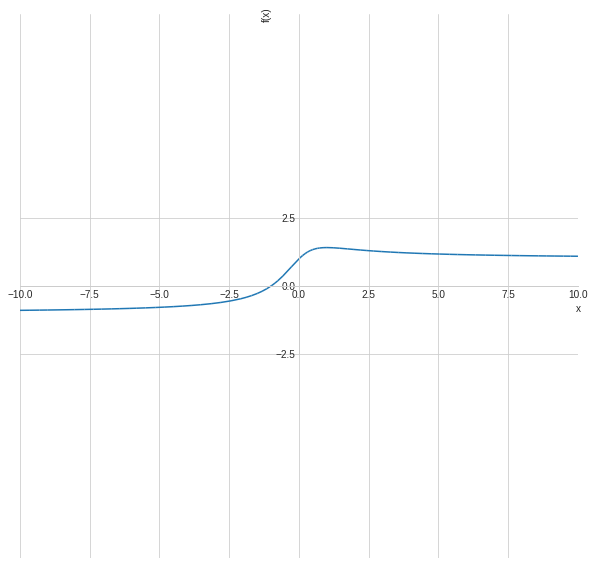

In [2]:
expr = r'\frac{x + 1}{\sqrt{x^{2} + 1}}'
f=(x+1)/sqrt(x**2+1)
#function_range(f,x,domain=S.Reals)
continuous_domain(f,x,domain=S.Reals) , limit(f,x,oo), limit(f,x,-oo), solve(diff(f,x)),
#f=-(x-1)**3+x**2
plt.rcParams['figure.figsize'] = 10,10
plot(f,show=True, xlim=(-10,10), ylim=(-10,10))
[(i.evalf(2), diff(diff(f)).subs(x,i)) for i in solve(diff(f,x))]



In [11]:
continuous_domain(f,x,domain=S.Reals), asintotas(f)

(Interval(-oo, oo),
 ([[], [(oo, 1), (-oo, -1)], [(oo, 1), (-oo, -1)]],
  'Asíntotas:\\\\$y=1$\\\\$y=-1$\\\\$y=1$ \\\\$y=-1$ \\\\'))

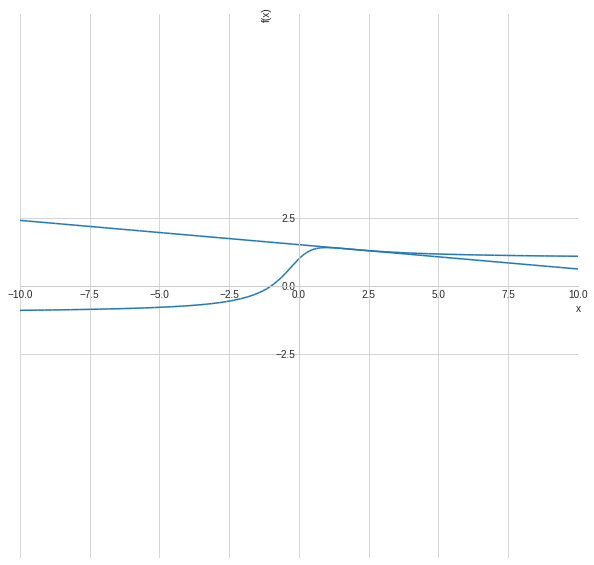

In [29]:
pend = diff(f,x).subs(x,2)
punto = Point(2,f.subs(x,2))
recta = Line(punto, slope=pend)
g=solve(recta.equation(),y)[0]
plot(f,g,show=True, xlim=(-10,10), ylim=(-10,10))
recta.equation()

Calcule: $\int \frac{x^{2} - 3 x + 3}{x - 1}\, dx$
    

In [67]:
integrate((x**2-3*x+3)/(x-1))

In [65]:
integrate((x**2),(x,-1,1))

In [66]:
Integral((x**2),(x,-1,1)).doit()

Considere: $\int \frac{x^{2} - 3 x + 3}{x - 1}\, dx$
* Determine las asíntotas de la función f(x).
* Determine los intervalos de crecimiento y de decrecimiento y los mínimos y máximos
relativos de la función f(x).

In [152]:
f= (x**2-3*x+3)/(x-1)
asintotas(f)

'x - 2'

([[(1, oo)], [(oo, oo), (-oo, -oo)], [(oo, x - 2), (-oo, x - 2)]],
 'Asíntotas:\\\\$x=1$$y=x - 2$ \\\\$y=x - 2$ \\\\')

In [156]:
g=x**2/(2*x-6)
asintotas(g)

'\\frac{x}{2} + \\frac{3}{2}'

([[(3, oo)], [(oo, oo), (-oo, -oo)], [(oo, x/2 + 3/2), (-oo, x/2 + 3/2)]],
 'Asíntotas:\\\\$x=3$\\\\$y=\\frac{x}{2} + \\frac{3}{2}$ \\\\$y=\\frac{x}{2} + \\frac{3}{2}$ \\\\')

In [166]:
h=(x-1)**3*(x-3)
expand(Integral(h).doit()+1)


In [121]:
puntuacion = '1'                          
                      
datos = [[r'0x-3',r'x^3-5x^2+2',r'\frac{{x - 1}}{{x + 5}}', r'7x-1', r'\frac{2}{x}'],]

# vectores iniciales correspondientes al texto del enunciado

for i, s in enumerate(datos) : 
    n_ejercicio = 'p65e06-'+str(i)
    enunciado_latex, enunciado, solucion = [],[],[]
    
    texto_ejercicio = r"""Halla el dominio de las siguientes funciones: 
    """
    
    display(md("**"+texto_ejercicio+"**"))
    
    for j, t in enumerate(s):
        enunciado_latex.append("$f(x)="+t+"$")
        enunciado.append(parse_latex(t))
        # voy por aquí

        sol = r"$Dom\left(f \right)="
        sol+=latex(S.Reals - singularities(eval(str(parse_latex(t))),x))+r"$"
        solucion.append(sol)
        display(md(enunciado_latex[j] +" $ \\rightarrow $" + solucion[j] ))
        
    # Estos los añado yo
    
    dato = r'\sqrt[3]{\frac{x + 1}{x - 2}}'
    enunciado_latex.append("$f(x)="+dato+"$")
    enunciado.append(parse_latex(dato))
    sol = r"$Dom\left(f \right)="
    sol+=latex(S.Reals - singularities((x+1)/(x-2),x))+r"$"
    solucion.append(sol)
    display(md(r"$f(x)="+dato+"$"+" $ \\rightarrow $" + sol))
    
    dato = r'\sqrt {{x^2} - 9}'
    enunciado_latex.append("$f(x)="+dato+"$")
    enunciado.append(parse_latex(dato))
    sol = r"$Dom\left(f \right)="
    sol+=latex(S.Reals - solve_univariate_inequality(x**2-9<0,x, relational=False))+r"$"
    solucion.append(sol)
    display(md(r"$f(x)="+dato+"$"+" $ \\rightarrow $" + sol))
    
    dato = r'\sqrt {x+3}'
    enunciado_latex.append("$f(x)="+dato+"$")
    enunciado.append(parse_latex(dato))
    sol = r"$Dom\left(f \right)="
    sol+=latex(S.Reals - solve_univariate_inequality(x+3<0,x, relational=False))+r"$"
    solucion.append(sol)
    display(md(r"$f(x)="+dato+"$"+" $ \\rightarrow $" + sol))

        
    df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '1', enun_tex=False, sol_tex=False), ignore_index=True)




**Halla el dominio de las siguientes funciones: 
    **

$f(x)=0x-3$ $ \rightarrow $$Dom\left(f \right)=\mathbb{R}$

$f(x)=x^3-5x^2+2$ $ \rightarrow $$Dom\left(f \right)=\mathbb{R}$

$f(x)=\frac{{x - 1}}{{x + 5}}$ $ \rightarrow $$Dom\left(f \right)=\left(-\infty, -5\right) \cup \left(-5, \infty\right)$

$f(x)=7x-1$ $ \rightarrow $$Dom\left(f \right)=\mathbb{R}$

$f(x)=\frac{2}{x}$ $ \rightarrow $$Dom\left(f \right)=\left(-\infty, 0\right) \cup \left(0, \infty\right)$

$f(x)=\sqrt[3]{\frac{x + 1}{x - 2}}$ $ \rightarrow $$Dom\left(f \right)=\left(-\infty, 2\right) \cup \left(2, \infty\right)$

$f(x)=\sqrt {{x^2} - 9}$ $ \rightarrow $$Dom\left(f \right)=\left(-\infty, -3\right] \cup \left[3, \infty\right)$

$f(x)=\sqrt {x+3}$ $ \rightarrow $$Dom\left(f \right)=\left[-3, \infty\right)$

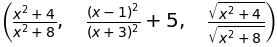

In [4]:
f = Lambda(x,x**2+5)
g = Lambda(x,(x-1)/(x+3))
h = Lambda(x,sqrt(x))
g(f(x)), f(g(x)),h(g(f(x))),


In [5]:
puntuacion = '1'                          
                      
datos = [[r'x^2+5',r'\frac{{x - 1}}{{x + 3}}',r'\sqrt{x}'],]

# vectores iniciales correspondientes al texto del enunciado

for i, s in enumerate(datos) : 
    n_ejercicio = 'p65e17-'+str(i)
    enunciado_latex, enunciado, solucion = [],[],[]
    
    texto_ejercicio = r"""Dadas las funciones $f(x)= {}$, $g(x)= {}$ y $h(x)= {}$. Calcula: 
    """.format(datos[i][0],datos[i][1],datos[i][2])
    
    display(md("**"+texto_ejercicio+"**"))
    
    f = Lambda(x,eval(str(parse_latex(s[0]))))
    g = Lambda(x,eval(str(parse_latex(s[1]))))
    h = Lambda(x,eval(str(parse_latex(s[2]))))
    
    apartados = [[r'g \circ f','g(f(x))'],[r'f \circ g','f(g(x))'],[r'h \circ g \circ f','h(g(f(x)))']]
    
    for j, t in enumerate(apartados):
        enunciado_latex.append("$"+t[0]+"$")
        enunciado.append(t[1])


        sol = r"$"+latex(S(t[1]))+"="
        sol+=latex(eval(t[1]))+r"$"
        solucion.append(sol)
        display(md(enunciado_latex[j] +" $ \\rightarrow $" + solucion[j] ))
        

        
    df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '1', enun_tex=False, sol_tex=False), ignore_index=True)




**Dadas las funciones $f(x)= x^2+5$, $g(x)= \frac{{x - 1}}{{x + 3}}$ y $h(x)= \sqrt{x}$. Calcula: 
    **

$g \circ f$ $ \rightarrow $$g{\left (f{\left (x \right )} \right )}=\frac{x^{2} + 4}{x^{2} + 8}$

$f \circ g$ $ \rightarrow $$f{\left (g{\left (x \right )} \right )}=\frac{\left(x - 1\right)^{2}}{\left(x + 3\right)^{2}} + 5$

$h \circ g \circ f$ $ \rightarrow $$h{\left (g{\left (f{\left (x \right )} \right )} \right )}=\frac{\sqrt{x^{2} + 4}}{\sqrt{x^{2} + 8}}$

**Halla la función inversa de $f(x)$, y comprueba el resultado, siendo:**

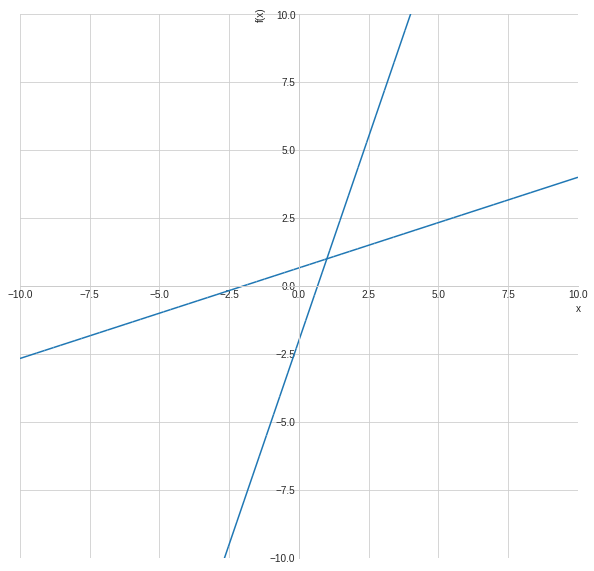

$f(x)=3 x - 2$ $ \rightarrow $$f^{-1}(x)=\frac{x}{3} + \frac{2}{3}$ \\ $f^{-1} \circ f(x)=x=x$ \\\\ \resizebox{0.4\textwidth}{!}{\includegraphics[width=1\columnwidth]{p66e23y24-0}}

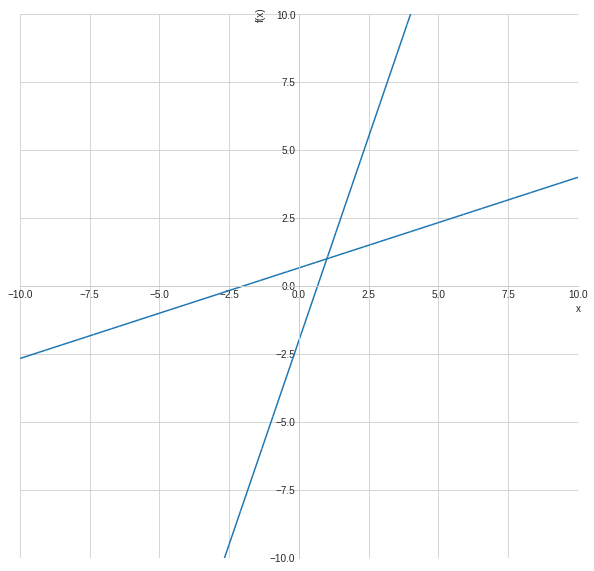

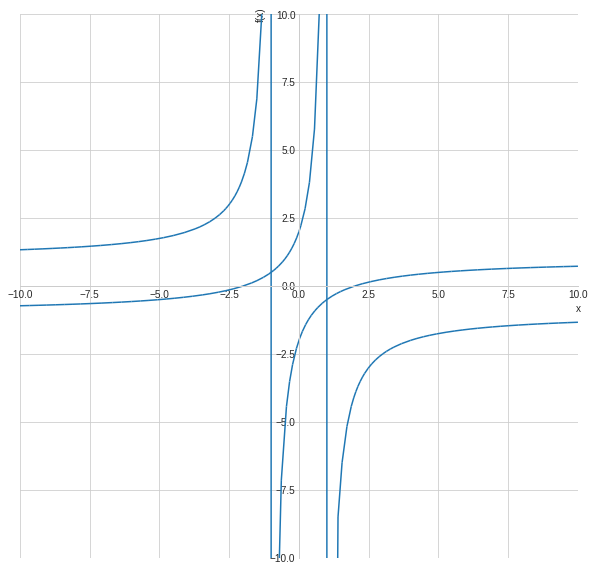

$f(x)=\frac{x + 2}{- x + 1}$ $ \rightarrow $$f^{-1}(x)=\frac{x - 2}{x + 1}$ \\ $f^{-1} \circ f(x)=\frac{-2 + \frac{x + 2}{- x + 1}}{1 + \frac{x + 2}{- x + 1}}=x$ \\\\ \resizebox{0.4\textwidth}{!}{\includegraphics[width=1\columnwidth]{p66e23y24-1}}

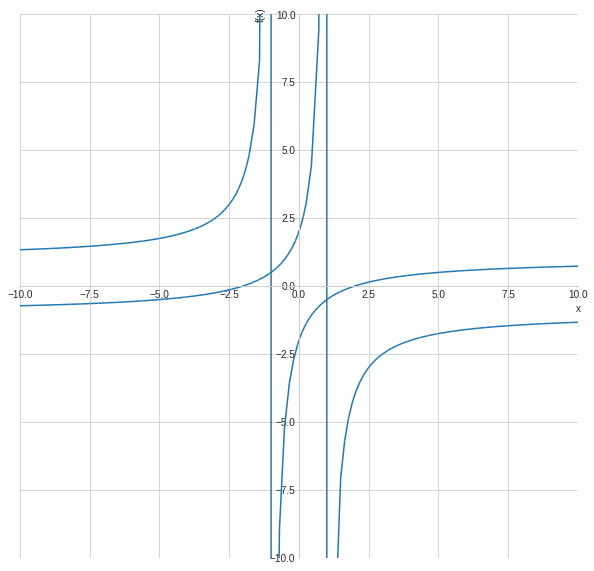

In [6]:
puntuacion = '1'                          
                      
datos = [r'3x-2',r'\frac{{2 + x}}{{1 - x}}']

# vectores iniciales correspondientes al texto del enunciado
n_ejercicio = 'p66e23y24'
enunciado_latex, enunciado, solucion = [],[],[]

texto_ejercicio = r"""Halla la función inversa de $f(x)$, y comprueba el resultado, siendo:"""
display(md("**"+texto_ejercicio+"**"))

for i, s in enumerate(datos) : 
    
    enunciado_latex.append("$f(x)="+latex(parse_latex(s))+"$")
    enunciado.append(s)
    
    inv = solve(S('x')-eval(str(parse_latex(s))).subs([(x,y)]),y)[0]
    f = Lambda(x,eval(str(parse_latex(s))))
    g = Lambda(x,eval(str(inv)))
    
    #display(f(x),g(x), f(g(x)), g(f(x)))
    sol = r"$f^{-1}(x)="
    sol+=latex(inv)+r"$ \\ $f^{-1} \circ f(x)="+ latex(g(f(x)))+ "=" + latex(simplify(g(f(x)))) + r"$ \\"
    
    plt.rcParams['figure.figsize'] = 10,10
    p1 = plot(f(x),g(x),show=True, xlim=(-10,10), ylim=(-10,10))
    p1.save(n_ejercicio+"-"+str(i)+".png")
    sol+=r"\\ \resizebox{0.4\textwidth}{!}{\includegraphics[width=1\columnwidth]{%s}}" % (n_ejercicio+"-"+str(i))
    
       
    
    solucion.append(sol)
    display(md(enunciado_latex[i] +" $ \\rightarrow $" + solucion[i] ))
        
df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '1', enun_tex=False, sol_tex=False), ignore_index=True)




**Representa gráficamente las siguientes funciones:**

$y=-5x$ $ \rightarrow $\\ \resizebox{0.4\textwidth}{!}{\includegraphics[width=1\columnwidth]{p68e28-0}}

$y=-5x+3$ $ \rightarrow $\\ \resizebox{0.4\textwidth}{!}{\includegraphics[width=1\columnwidth]{p68e28-1}}

$y=x^2-2x-3$ $ \rightarrow $\\ \resizebox{0.4\textwidth}{!}{\includegraphics[width=1\columnwidth]{p68e28-2}}

$y=4x^2-8x-21$ $ \rightarrow $\\ \resizebox{0.4\textwidth}{!}{\includegraphics[width=1\columnwidth]{p68e28-3}}

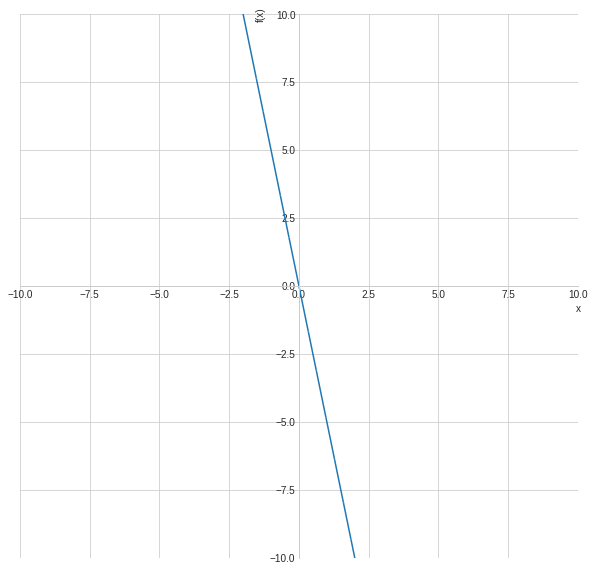

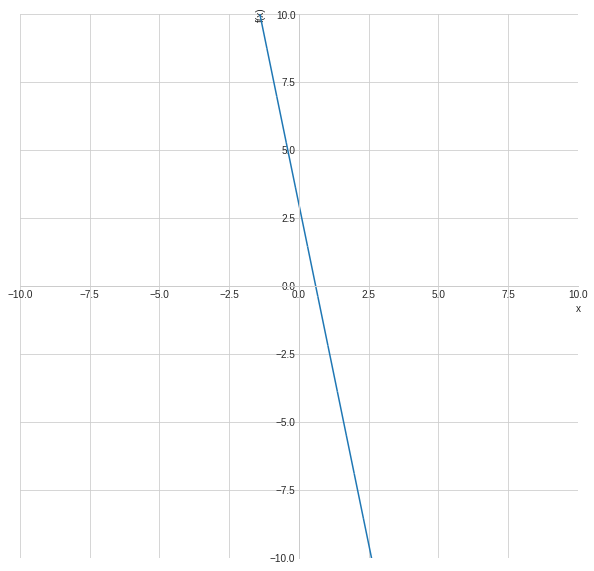

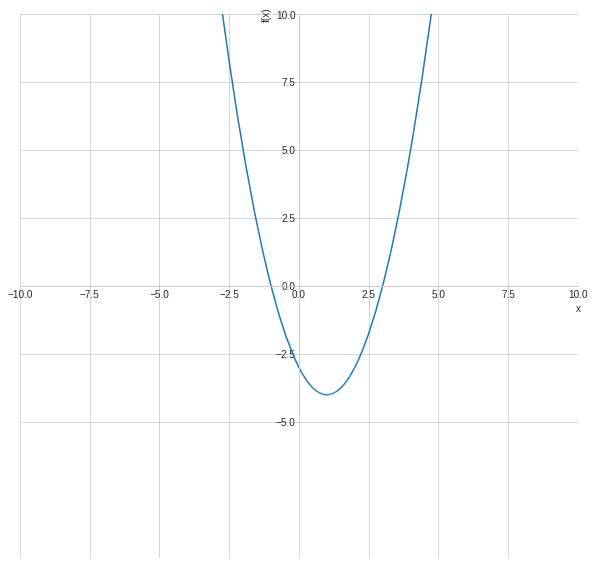

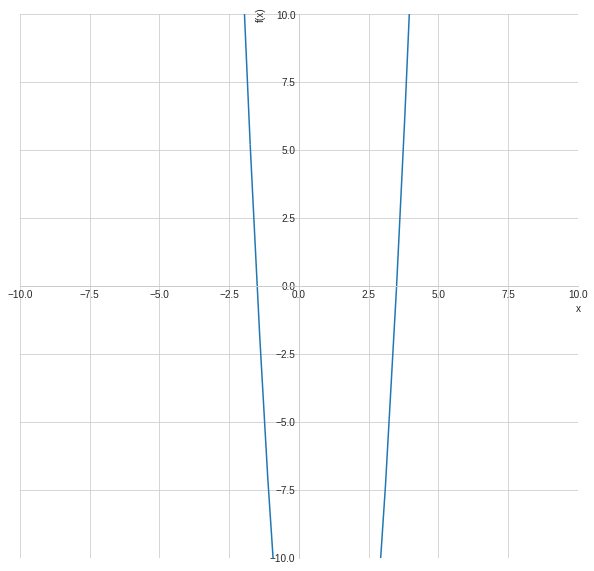

In [7]:
puntuacion = '1'                          
                      
datos = [r'-5x',r'-5x+3', r'x^2-2x-3',r'4x^2-8x-21']

# vectores iniciales correspondientes al texto del enunciado
n_ejercicio = 'p68e28'
enunciado_latex, enunciado, solucion = [],[],[]

texto_ejercicio = r"""Representa gráficamente las siguientes funciones:"""
display(md("**"+texto_ejercicio+"**"))

for i, s in enumerate(datos) : 
    
    enunciado_latex.append("$y="+s+"$")
    enunciado.append(s)
    
       
    plt.rcParams['figure.figsize'] = 10,10
    p1 = plot(parse_latex(s),show=False, xlim=(-10,10), ylim=(-10,10))
    p1.save(n_ejercicio+"-"+str(i)+".png")
    sol=r"\\ \resizebox{0.4\textwidth}{!}{\includegraphics[width=1\columnwidth]{%s}}" % (n_ejercicio+"-"+str(i))
    
       
    
    solucion.append(sol)
    display(md(enunciado_latex[i] +" $ \\rightarrow $" + solucion[i] ))
        
df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '1', enun_tex=False, sol_tex=False), ignore_index=True)




**Representa gráficamente las siguientes funciones:**

$y=\begin{cases} 2 x + 6 & \text{for}\: x < -2 \\x^{2} - 2 & \text{for}\: x \leq -1 \\1 & \text{otherwise} \end{cases}$ $ \rightarrow $\\ \resizebox{0.4\textwidth}{!}{\includegraphics[width=1\columnwidth]{p68e35-0}}

$y=\left|{x + 1}\right|$ $ \rightarrow $\\ \resizebox{0.4\textwidth}{!}{\includegraphics[width=1\columnwidth]{p68e35-1}}

$y=\left|{ x^{2} - 2 x - 3}\right|$ $ \rightarrow $\\ \resizebox{0.4\textwidth}{!}{\includegraphics[width=1\columnwidth]{p68e35-2}}

$y=\begin{cases} \frac{x}{2} & \text{for}\: x \geq 1 \\\frac{1}{x - 1} & \text{otherwise} \end{cases}$ $ \rightarrow $\\ \resizebox{0.4\textwidth}{!}{\includegraphics[width=1\columnwidth]{p68e35-3}}

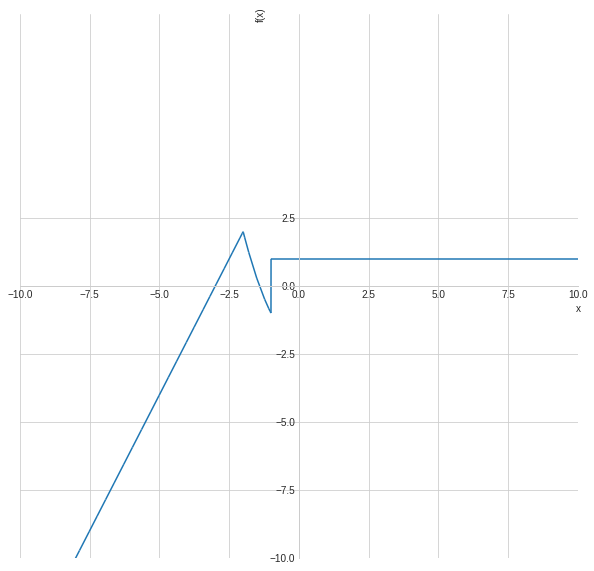

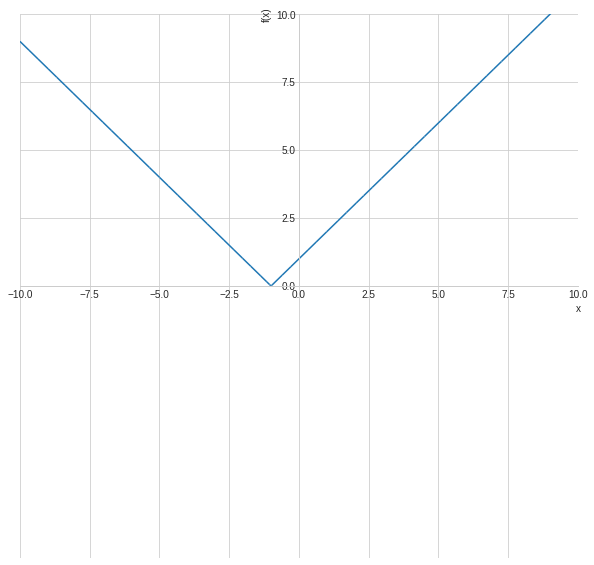

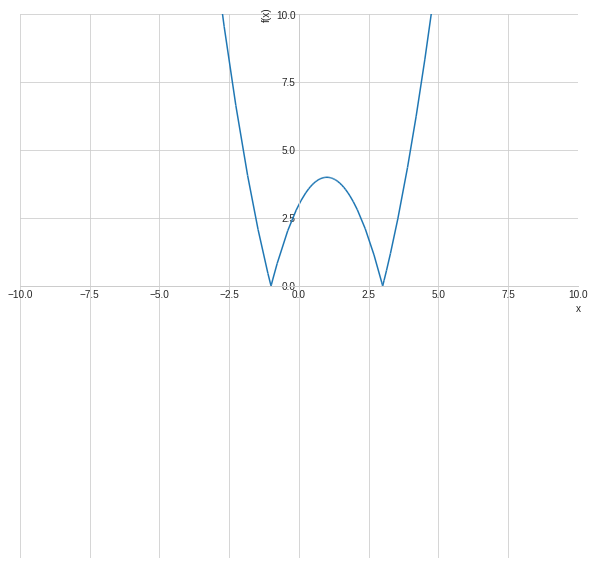

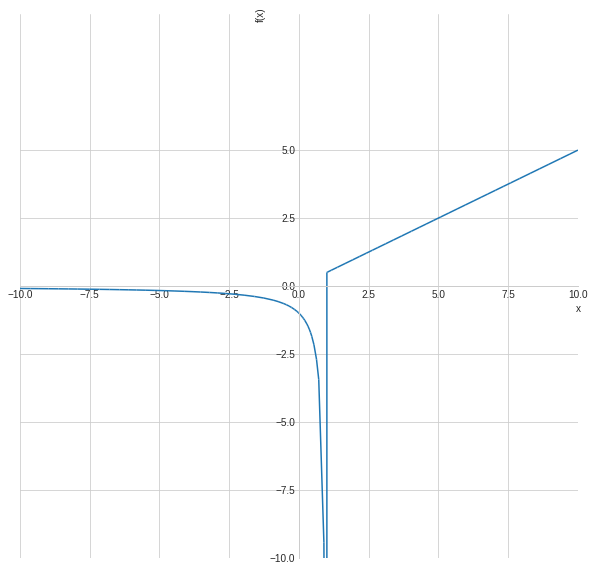

In [8]:
puntuacion = '1'                          
                      
datos = [['\\begin{cases} 2 x + 6 & \\text{for}\\: x < -2 \\\\x^{2} - 2 & \\text{for}\\: x \\leq -1 \\\\1 & \\text{otherwise} \\end{cases}',Piecewise((2*x + 6,x<-2),(x**2-2,x<=-1),(1, True))],
         ['\\left|{x + 1}\\right|', abs(x+1)],
         ['\\left|{ x^{2} - 2 x - 3}\\right|', abs(x**2-2*x-3)],
         ['\\begin{cases} \\frac{x}{2} & \\text{for}\\: x \\geq 1 \\\\\\frac{1}{x - 1} & \\text{otherwise} \\end{cases}', Piecewise((x/2,x>=1),(1/(x-1),True))],
        ]

# vectores iniciales correspondientes al texto del enunciado
n_ejercicio = 'p68e35'
enunciado_latex, enunciado, solucion = [],[],[]

texto_ejercicio = r"""Representa gráficamente las siguientes funciones:"""
display(md("**"+texto_ejercicio+"**"))

for i, s in enumerate(datos) : 
    
    enunciado_latex.append("$y="+s[0]+"$")
    enunciado.append(s[1])
    
       
    plt.rcParams['figure.figsize'] = 10,10
    p1 = plot(s[1],show=False, xlim=(-10,10), ylim=(-10,10))
    p1.save(n_ejercicio+"-"+str(i)+".png")
    sol=r"\\ \resizebox{0.4\textwidth}{!}{\includegraphics[width=1\columnwidth]{%s}}" % (n_ejercicio+"-"+str(i))
    
       
    
    solucion.append(sol)
    display(md(enunciado_latex[i] +" $ \\rightarrow $" + solucion[i] ))
        
df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '1', enun_tex=False, sol_tex=False), ignore_index=True)




In [9]:
latex(Piecewise((x/2,x>=1),(1/(x-1),True)))

'\\begin{cases} \\frac{x}{2} & \\text{for}\\: x \\geq 1 \\\\\\frac{1}{x - 1} & \\text{otherwise} \\end{cases}'

In [29]:
expr = x**3-9*x**2+15*x+20
solve(expr.diff()),expr.diff().subs(x,0), expr.diff().subs(x,2), expr.subs(x,3),expr.subs(x,8)

In [31]:
expr=1/200*(-x**2+100*x+7500)
solve(18-expr)

In [10]:
print(plt.style.available)

['seaborn-poster', 'seaborn-colorblind', 'tableau-colorblind10', '_classic_test', 'bmh', 'seaborn-talk', 'seaborn-dark', 'classic', 'seaborn-white', 'seaborn-dark-palette', 'Solarize_Light2', 'fast', 'fivethirtyeight', 'seaborn-muted', 'seaborn-bright', 'seaborn-ticks', 'seaborn-pastel', 'seaborn-paper', 'seaborn-darkgrid', 'ggplot', 'grayscale', 'seaborn-whitegrid', 'seaborn-deep', 'dark_background', 'seaborn-notebook', 'seaborn']


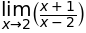

'Límite por la izquierda / Límite por la derecha / valor de la función en el punto: '

{'Límite por la izquierda': -oo,
 'Límite por la derecha': oo,
 'Valor de la función en el punto': zoo}

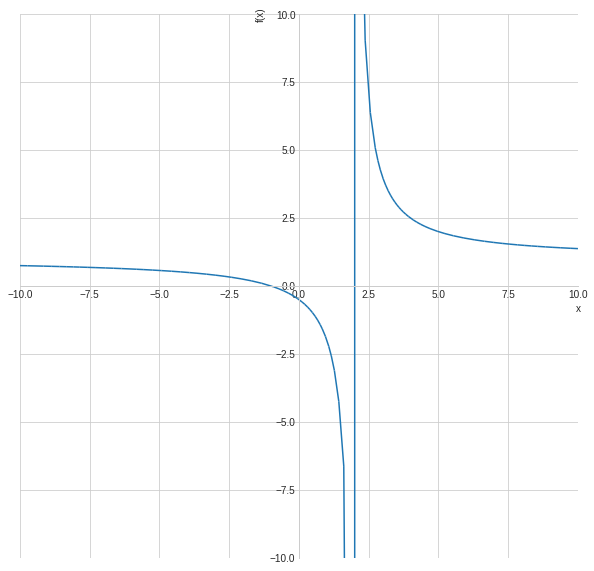

'lim-2.png'

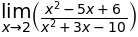

'Límite por la izquierda / Límite por la derecha / valor de la función en el punto: '

{'Límite por la izquierda': -1/7,
 'Límite por la derecha': -1/7,
 'Valor de la función en el punto': nan}

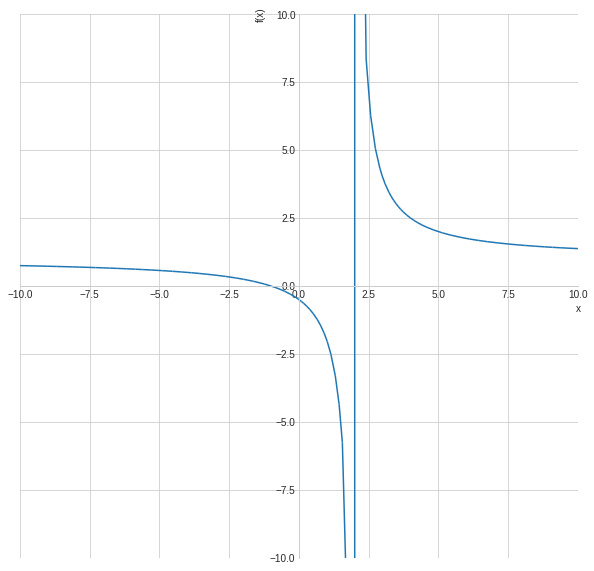

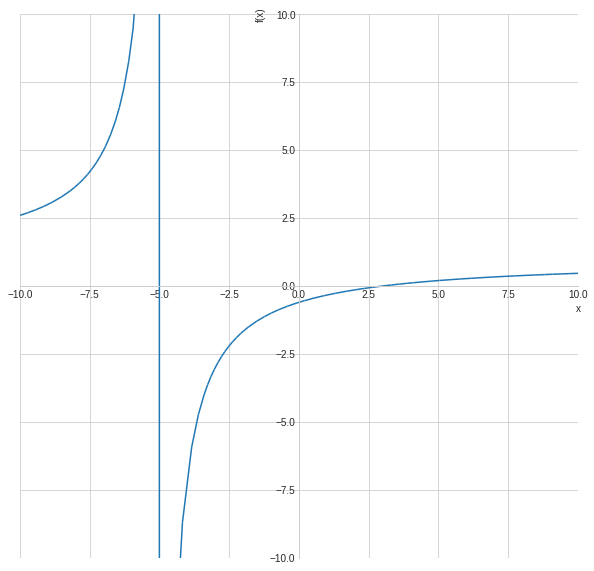

'lim-2.png'

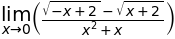

'Límite por la izquierda / Límite por la derecha / valor de la función en el punto: '

{'Límite por la izquierda': -sqrt(2)/2,
 'Límite por la derecha': -sqrt(2)/2,
 'Valor de la función en el punto': nan}

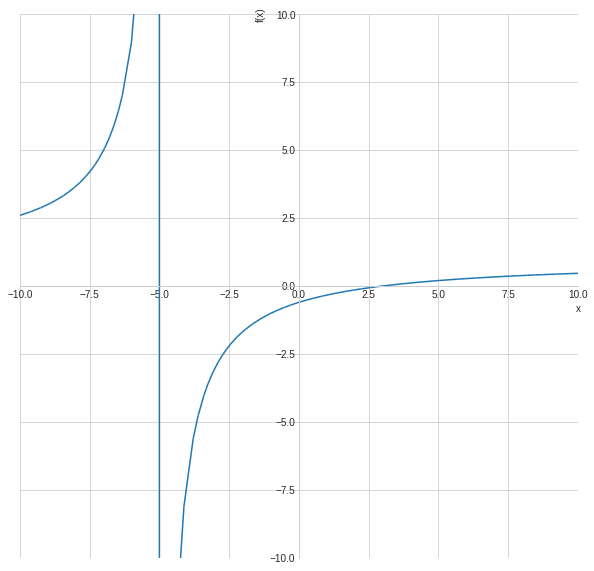

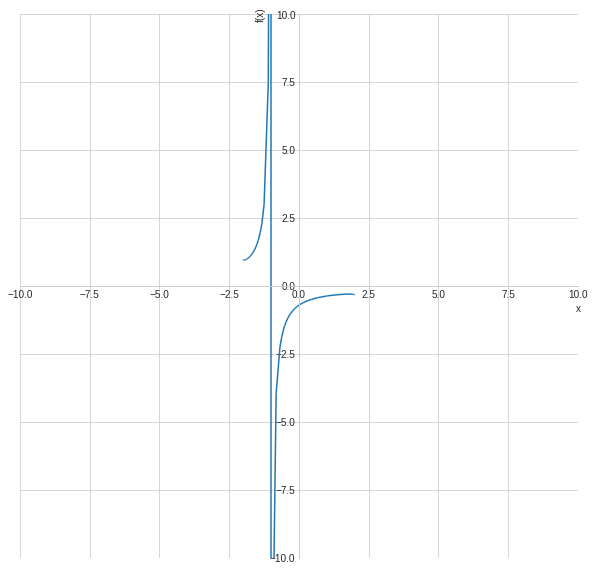

'lim-0.png'

[None, None, None]

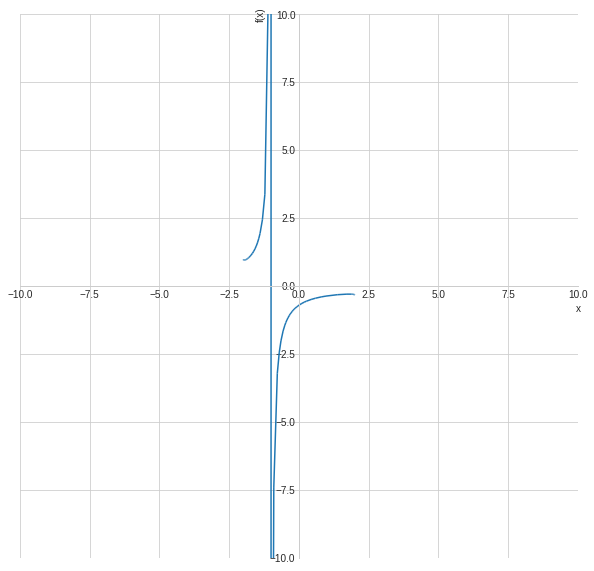

In [12]:
def lim(expr,x0):
    f = Lambda(x,eval(expr))
    display(Limit(S(expr),x,x0,dir='+-'))
    display("Límite por la izquierda / Límite por la derecha / valor de la función en el punto: ")
    display([limit(f(x),x,x0, dir='-'),limit(f(x),x,x0), f(x0)])
    display({'Límite por la izquierda':limit(f(x),x,x0, dir='-'),'Límite por la derecha':limit(f(x),x,x0),'Valor de la función en el punto': f(x0)})
    plt.rcParams['figure.figsize'] = 10,10
    p1 = plot(f(x),xlim=(-10,10), ylim=(-10,10))
    #p1.save("lim-"+expr+"-"+str(x0)+".png")
    p1.save("a-ver.png")
    display("lim-"+str(x0)+".png")
    
    
# lim('(x+1)/(x-2)',2), lim('(x**2-5*x+6)/(x**2+3*x-10)',2)

datos = [['(x+1)/(x-2)',2],['(x**2-5*x+6)/(x**2+3*x-10)',2], ['(sqrt(2-x)-sqrt(2+x))/(x**2+x)',0]]
[lim(k[0],k[1]) for k in datos]


In [13]:
from sympy import Piecewise
f=x**2
g=2*x-1
p = Piecewise( (0, x<-1), (f, x<=1), (g, True))
p


⎧   0     for x < -1
⎪                   
⎪   2               
⎨  x      for x ≤ 1 
⎪                   
⎪2⋅x - 1  otherwise 
⎩                   

In [14]:
f=x**2
g=2*x-1
p = Piecewise( (0, x<-1), (f, x<1), (g, x>1))
p

⎧   0     for x < -1
⎪                   
⎪   2               
⎨  x      for x < 1 
⎪                   
⎪2⋅x - 1  for x > 1 
⎩                   

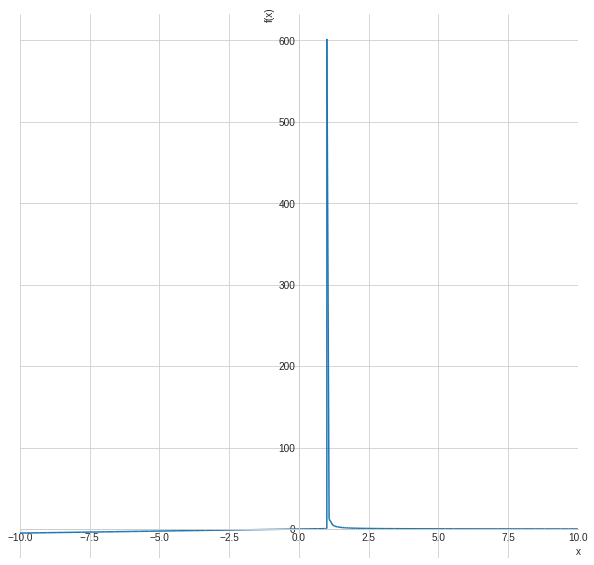

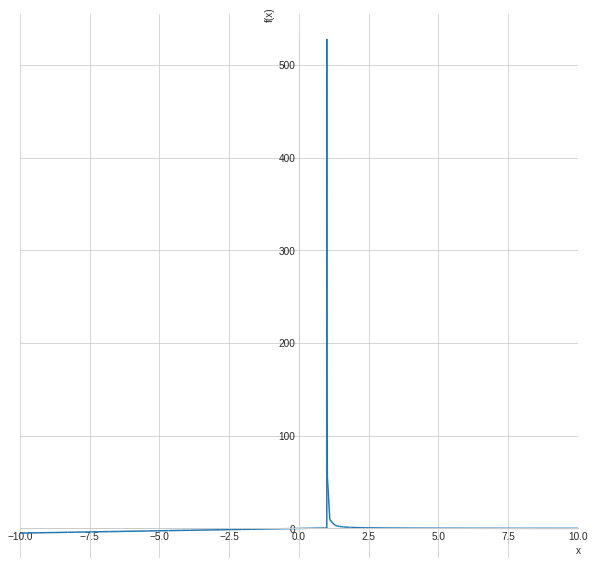

In [15]:
p1=plot(Piecewise((x/2,x<=1),(1/(x-1),x>1)))
fg, ax = p1._backend.fig, p1._backend.ax
p1.autoscale
ax.set_aspect("equal")
p1.show()

In [16]:
df_ejercicios

enunciado_latex  \
0                                         $f(x)=0x-3$   
1                                   $f(x)=x^3-5x^2+2$   
2                      $f(x)=\frac{{x - 1}}{{x + 5}}$   
3                                         $f(x)=7x-1$   
4                                  $f(x)=\frac{2}{x}$   
5                $f(x)=\sqrt[3]{\frac{x + 1}{x - 2}}$   
6                            $f(x)=\sqrt {{x^2} - 9}$   
7                                  $f(x)=\sqrt {x+3}$   
8                                         $g \circ f$   
9                                         $f \circ g$   
10                                $h \circ g \circ f$   
11                                     $f(x)=3 x - 2$   
12                       $f(x)=\frac{x + 2}{- x + 1}$   
13                                            $y=-5x$   
14                                          $y=-5x+3$   
15                                       $y=x^2-2x-3$   
16                                     $y=4x^2-8x-21$   
17  $y=\begin{cases} 2 x + 6 & \text{for}\: x < -2...   
18                           $y=\left|{x + 1}\right|$   
19                $y=\left|{ x^{2} - 2 x - 3}\right|$   
20  $y=\begin{cases} \frac{x}{2} & \text{for}\: x ...   

                                            enunciado  \
0                                             0*x - 3   
1                                   x**3 - 5*x**2 + 2   
2                                     (x - 1)/(x + 5)   
3                                             7*x - 1   
4                                                 2/x   
5                            ((x + 1)/(x - 2))**(1/3)   
6                                      sqrt(x**2 - 9)   
7                                         sqrt(x + 3)   
8                                             g(f(x))   
9                                             f(g(x))   
10                                         h(g(f(x)))   
11                                               3x-2   
12                            \frac{{2 + x}}{{1 - x}}   
13                                                -5x   
14                                              -5x+3   
15                                           x^2-2x-3   
16                                         4x^2-8x-21   
17  Piecewise((2*x + 6, x < -2), (x**2 - 2, x <= -...   
18                                         Abs(x + 1)   
19                               Abs(-x**2 + 2*x + 3)   
20        Piecewise((x/2, x >= 1), (1/(x - 1), True))   

                                             solucion  \
0                     $Dom\left(f \right)=\mathbb{R}$   
1                     $Dom\left(f \right)=\mathbb{R}$   
2   $Dom\left(f \right)=\left(-\infty, -5\right) \...   
3                     $Dom\left(f \right)=\mathbb{R}$   
4   $Dom\left(f \right)=\left(-\infty, 0\right) \c...   
5   $Dom\left(f \right)=\left(-\infty, 2\right) \c...   
6   $Dom\left(f \right)=\left(-\infty, -3\right] \...   
7        $Dom\left(f \right)=\left[-3, \infty\right)$   
8   $g{\left (f{\left (x \right )} \right )}=\frac...   
9   $f{\left (g{\left (x \right )} \right )}=\frac...   
10  $h{\left (g{\left (f{\left (x \right )} \right...   
11  $f^{-1}(x)=\frac{x}{3} + \frac{2}{3}$ \\ $f^{-...   
12  $f^{-1}(x)=\frac{x - 2}{x + 1}$ \\ $f^{-1} \ci...   
13  \\ \resizebox{0.4\textwidth}{!}{\includegraphi...   
14  \\ \resizebox{0.4\textwidth}{!}{\includegraphi...   
15  \\ \resizebox{0.4\textwidth}{!}{\includegraphi...   
16  \\ \resizebox{0.4\textwidth}{!}{\includegraphi...   
17  \\ \resizebox{0.4\textwidth}{!}{\includegraphi...   
18  \\ \resizebox{0.4\textwidth}{!}{\includegraphi...   
19  \\ \resizebox{0.4\textwidth}{!}{\includegraphi...   
20  \\ \resizebox{0.4\textwidth}{!}{\includegraphi...   

                                                texto curso          titulo  \
0   Halla el dominio de las siguientes funciones: ...   1BC  31 - Funciones   
1   Halla el dominio de las siguientes funciones: ...   1BC  31 - Funciones   
2   Halla el dominio de las siguient

In [17]:
df_ejercicios.to_csv('ejercicios31.csv', index = False)

In [18]:
df_ejercicios = pd.read_csv('ejercicios31.csv', index_col= None)

In [19]:
escribir_preambulo(fichero, titulo, 'ejercicios')
for s in df_ejercicios.groupby('n_ejercicio').count().index : 
    display(md("**Ejercicio: **" + s ))
    display(df_ejercicios[df_ejercicios.n_ejercicio == s])
    escribir_ejercicios(df_ejercicios[df_ejercicios.n_ejercicio == s],fichero)

escribir_fin(fichero)

**Ejercicio: **p65e06-0

enunciado_latex                 enunciado  \
0                           $f(x)=0x-3$                   0*x - 3   
1                     $f(x)=x^3-5x^2+2$         x**3 - 5*x**2 + 2   
2        $f(x)=\frac{{x - 1}}{{x + 5}}$           (x - 1)/(x + 5)   
3                           $f(x)=7x-1$                   7*x - 1   
4                    $f(x)=\frac{2}{x}$                       2/x   
5  $f(x)=\sqrt[3]{\frac{x + 1}{x - 2}}$  ((x + 1)/(x - 2))**(1/3)   
6              $f(x)=\sqrt {{x^2} - 9}$            sqrt(x**2 - 9)   
7                    $f(x)=\sqrt {x+3}$               sqrt(x + 3)   

                                            solucion  \
0                    $Dom\left(f \right)=\mathbb{R}$   
1                    $Dom\left(f \right)=\mathbb{R}$   
2  $Dom\left(f \right)=\left(-\infty, -5\right) \...   
3                    $Dom\left(f \right)=\mathbb{R}$   
4  $Dom\left(f \right)=\left(-\infty, 0\right) \c...   
5  $Dom\left(f \right)=\left(-\infty, 2\right) \c...   
6  $Dom\left(f \right)=\left(-\infty, -3\right] \...   
7       $Dom\left(f \right)=\left[-3, \infty\right)$   

                                               texto curso          titulo  \
0  Halla el dominio de las siguientes funciones: ...   1BC  31 - Funciones   
1  Halla el dominio de las siguientes funciones: ...   1BC  31 - Funciones   
2  Halla el dominio de las siguientes funciones: ...   1BC  31 - Funciones   
3  Halla el dominio de las siguientes funciones: ...   1BC  31 - Funciones   
4  Halla el dominio de las siguientes funciones: ...   1BC  31 - Funciones   
5  Halla el dominio de las siguientes funciones: ...   1BC  31 - Funciones   
6  Halla el dominio de las siguientes funciones: ...   1BC  31 - Funciones   
7  Halla el dominio de las siguientes funciones: ...   1BC  31 - Funciones   

  n_ejercicio  dificultad  n_columnas  puntos  enun_tex  sol_tex  
0    p65e06-0           5           1       1     False    False  
1    p65e06-0           5           1       1     False    False  
2    p65e06-0           5           1       1     False    False  
3    p65e06-0           5           1       1     False    False  
4    p65e06-0           5           1       1     False    False  
5    p65e06-0           5           1       1     False    False  
6    p65e06-0           5           1       1     False    False  
7    p65e06-0           5           1       1     False    False

**Ejercicio: **p65e17-0

enunciado_latex   enunciado  \
8           $g \circ f$     g(f(x))   
9           $f \circ g$     f(g(x))   
10  $h \circ g \circ f$  h(g(f(x)))   

                                             solucion  \
8   $g{\left (f{\left (x \right )} \right )}=\frac...   
9   $f{\left (g{\left (x \right )} \right )}=\frac...   
10  $h{\left (g{\left (f{\left (x \right )} \right...   

                                                texto curso          titulo  \
8   Dadas las funciones $f(x)= x^2+5$, $g(x)= \fra...   1BC  31 - Funciones   
9   Dadas las funciones $f(x)= x^2+5$, $g(x)= \fra...   1BC  31 - Funciones   
10  Dadas las funciones $f(x)= x^2+5$, $g(x)= \fra...   1BC  31 - Funciones   

   n_ejercicio  dificultad  n_columnas  puntos  enun_tex  sol_tex  
8     p65e17-0           5           1       1     False    False  
9     p65e17-0           5           1       1     False    False  
10    p65e17-0           5           1       1     False    False

**Ejercicio: **p66e23y24

enunciado_latex                enunciado  \
11                $f(x)=3 x - 2$                     3x-2   
12  $f(x)=\frac{x + 2}{- x + 1}$  \frac{{2 + x}}{{1 - x}}   

                                             solucion  \
11  $f^{-1}(x)=\frac{x}{3} + \frac{2}{3}$ \\ $f^{-...   
12  $f^{-1}(x)=\frac{x - 2}{x + 1}$ \\ $f^{-1} \ci...   

                                                texto curso          titulo  \
11  Halla la función inversa de $f(x)$, y comprueb...   1BC  31 - Funciones   
12  Halla la función inversa de $f(x)$, y comprueb...   1BC  31 - Funciones   

   n_ejercicio  dificultad  n_columnas  puntos  enun_tex  sol_tex  
11   p66e23y24           5           1       1     False    False  
12   p66e23y24           5           1       1     False    False

**Ejercicio: **p68e28

enunciado_latex   enunciado  \
13         $y=-5x$         -5x   
14       $y=-5x+3$       -5x+3   
15    $y=x^2-2x-3$    x^2-2x-3   
16  $y=4x^2-8x-21$  4x^2-8x-21   

                                             solucion  \
13  \\ \resizebox{0.4\textwidth}{!}{\includegraphi...   
14  \\ \resizebox{0.4\textwidth}{!}{\includegraphi...   
15  \\ \resizebox{0.4\textwidth}{!}{\includegraphi...   
16  \\ \resizebox{0.4\textwidth}{!}{\includegraphi...   

                                                texto curso          titulo  \
13  Representa gráficamente las siguientes funciones:   1BC  31 - Funciones   
14  Representa gráficamente las siguientes funciones:   1BC  31 - Funciones   
15  Representa gráficamente las siguientes funciones:   1BC  31 - Funciones   
16  Representa gráficamente las siguientes funciones:   1BC  31 - Funciones   

   n_ejercicio  dificultad  n_columnas  puntos  enun_tex  sol_tex  
13      p68e28           5           1       1     False    False  
14      p68e28           5           1       1     False    False  
15      p68e28           5           1       1     False    False  
16      p68e28           5           1       1     False    False

**Ejercicio: **p68e35

enunciado_latex  \
17  $y=\begin{cases} 2 x + 6 & \text{for}\: x < -2...   
18                           $y=\left|{x + 1}\right|$   
19                $y=\left|{ x^{2} - 2 x - 3}\right|$   
20  $y=\begin{cases} \frac{x}{2} & \text{for}\: x ...   

                                            enunciado  \
17  Piecewise((2*x + 6, x < -2), (x**2 - 2, x <= -...   
18                                         Abs(x + 1)   
19                               Abs(-x**2 + 2*x + 3)   
20        Piecewise((x/2, x >= 1), (1/(x - 1), True))   

                                             solucion  \
17  \\ \resizebox{0.4\textwidth}{!}{\includegraphi...   
18  \\ \resizebox{0.4\textwidth}{!}{\includegraphi...   
19  \\ \resizebox{0.4\textwidth}{!}{\includegraphi...   
20  \\ \resizebox{0.4\textwidth}{!}{\includegraphi...   

                                                texto curso          titulo  \
17  Representa gráficamente las siguientes funciones:   1BC  31 - Funciones   
18  Representa gráficamente las siguientes funciones:   1BC  31 - Funciones   
19  Representa gráficamente las siguientes funciones:   1BC  31 - Funciones   
20  Representa gráficamente las siguientes funciones:   1BC  31 - Funciones   

   n_ejercicio  dificultad  n_columnas  puntos  enun_tex  sol_tex  
17      p68e35           5           1       1     False    False  
18      p68e35           5           1       1     False    False  
19      p68e35           5           1       1     False    False  
20      p68e35           5           1       1     False    False

In [20]:
escribir_preambulo(fichero, titulo, 'ejercicios')
for s in df_ejercicios.groupby('n_ejercicio').count().index : 
    display(md("**Ejercicio: **" + s ))
    display(df_ejercicios[df_ejercicios.n_ejercicio == s])
    escribir_ejercicios(df_ejercicios[df_ejercicios.n_ejercicio == s],fichero)

escribir_fin(fichero)

**Ejercicio: **p65e06-0

enunciado_latex                 enunciado  \
0                           $f(x)=0x-3$                   0*x - 3   
1                     $f(x)=x^3-5x^2+2$         x**3 - 5*x**2 + 2   
2        $f(x)=\frac{{x - 1}}{{x + 5}}$           (x - 1)/(x + 5)   
3                           $f(x)=7x-1$                   7*x - 1   
4                    $f(x)=\frac{2}{x}$                       2/x   
5  $f(x)=\sqrt[3]{\frac{x + 1}{x - 2}}$  ((x + 1)/(x - 2))**(1/3)   
6              $f(x)=\sqrt {{x^2} - 9}$            sqrt(x**2 - 9)   
7                    $f(x)=\sqrt {x+3}$               sqrt(x + 3)   

                                            solucion  \
0                    $Dom\left(f \right)=\mathbb{R}$   
1                    $Dom\left(f \right)=\mathbb{R}$   
2  $Dom\left(f \right)=\left(-\infty, -5\right) \...   
3                    $Dom\left(f \right)=\mathbb{R}$   
4  $Dom\left(f \right)=\left(-\infty, 0\right) \c...   
5  $Dom\left(f \right)=\left(-\infty, 2\right) \c...   
6  $Dom\left(f \right)=\left(-\infty, -3\right] \...   
7       $Dom\left(f \right)=\left[-3, \infty\right)$   

                                               texto curso          titulo  \
0  Halla el dominio de las siguientes funciones: ...   1BC  31 - Funciones   
1  Halla el dominio de las siguientes funciones: ...   1BC  31 - Funciones   
2  Halla el dominio de las siguientes funciones: ...   1BC  31 - Funciones   
3  Halla el dominio de las siguientes funciones: ...   1BC  31 - Funciones   
4  Halla el dominio de las siguientes funciones: ...   1BC  31 - Funciones   
5  Halla el dominio de las siguientes funciones: ...   1BC  31 - Funciones   
6  Halla el dominio de las siguientes funciones: ...   1BC  31 - Funciones   
7  Halla el dominio de las siguientes funciones: ...   1BC  31 - Funciones   

  n_ejercicio  dificultad  n_columnas  puntos  enun_tex  sol_tex  
0    p65e06-0           5           1       1     False    False  
1    p65e06-0           5           1       1     False    False  
2    p65e06-0           5           1       1     False    False  
3    p65e06-0           5           1       1     False    False  
4    p65e06-0           5           1       1     False    False  
5    p65e06-0           5           1       1     False    False  
6    p65e06-0           5           1       1     False    False  
7    p65e06-0           5           1       1     False    False

**Ejercicio: **p65e17-0

enunciado_latex   enunciado  \
8           $g \circ f$     g(f(x))   
9           $f \circ g$     f(g(x))   
10  $h \circ g \circ f$  h(g(f(x)))   

                                             solucion  \
8   $g{\left (f{\left (x \right )} \right )}=\frac...   
9   $f{\left (g{\left (x \right )} \right )}=\frac...   
10  $h{\left (g{\left (f{\left (x \right )} \right...   

                                                texto curso          titulo  \
8   Dadas las funciones $f(x)= x^2+5$, $g(x)= \fra...   1BC  31 - Funciones   
9   Dadas las funciones $f(x)= x^2+5$, $g(x)= \fra...   1BC  31 - Funciones   
10  Dadas las funciones $f(x)= x^2+5$, $g(x)= \fra...   1BC  31 - Funciones   

   n_ejercicio  dificultad  n_columnas  puntos  enun_tex  sol_tex  
8     p65e17-0           5           1       1     False    False  
9     p65e17-0           5           1       1     False    False  
10    p65e17-0           5           1       1     False    False

**Ejercicio: **p66e23y24

enunciado_latex                enunciado  \
11                $f(x)=3 x - 2$                     3x-2   
12  $f(x)=\frac{x + 2}{- x + 1}$  \frac{{2 + x}}{{1 - x}}   

                                             solucion  \
11  $f^{-1}(x)=\frac{x}{3} + \frac{2}{3}$ \\ $f^{-...   
12  $f^{-1}(x)=\frac{x - 2}{x + 1}$ \\ $f^{-1} \ci...   

                                                texto curso          titulo  \
11  Halla la función inversa de $f(x)$, y comprueb...   1BC  31 - Funciones   
12  Halla la función inversa de $f(x)$, y comprueb...   1BC  31 - Funciones   

   n_ejercicio  dificultad  n_columnas  puntos  enun_tex  sol_tex  
11   p66e23y24           5           1       1     False    False  
12   p66e23y24           5           1       1     False    False

**Ejercicio: **p68e28

enunciado_latex   enunciado  \
13         $y=-5x$         -5x   
14       $y=-5x+3$       -5x+3   
15    $y=x^2-2x-3$    x^2-2x-3   
16  $y=4x^2-8x-21$  4x^2-8x-21   

                                             solucion  \
13  \\ \resizebox{0.4\textwidth}{!}{\includegraphi...   
14  \\ \resizebox{0.4\textwidth}{!}{\includegraphi...   
15  \\ \resizebox{0.4\textwidth}{!}{\includegraphi...   
16  \\ \resizebox{0.4\textwidth}{!}{\includegraphi...   

                                                texto curso          titulo  \
13  Representa gráficamente las siguientes funciones:   1BC  31 - Funciones   
14  Representa gráficamente las siguientes funciones:   1BC  31 - Funciones   
15  Representa gráficamente las siguientes funciones:   1BC  31 - Funciones   
16  Representa gráficamente las siguientes funciones:   1BC  31 - Funciones   

   n_ejercicio  dificultad  n_columnas  puntos  enun_tex  sol_tex  
13      p68e28           5           1       1     False    False  
14      p68e28           5           1       1     False    False  
15      p68e28           5           1       1     False    False  
16      p68e28           5           1       1     False    False

**Ejercicio: **p68e35

enunciado_latex  \
17  $y=\begin{cases} 2 x + 6 & \text{for}\: x < -2...   
18                           $y=\left|{x + 1}\right|$   
19                $y=\left|{ x^{2} - 2 x - 3}\right|$   
20  $y=\begin{cases} \frac{x}{2} & \text{for}\: x ...   

                                            enunciado  \
17  Piecewise((2*x + 6, x < -2), (x**2 - 2, x <= -...   
18                                         Abs(x + 1)   
19                               Abs(-x**2 + 2*x + 3)   
20        Piecewise((x/2, x >= 1), (1/(x - 1), True))   

                                             solucion  \
17  \\ \resizebox{0.4\textwidth}{!}{\includegraphi...   
18  \\ \resizebox{0.4\textwidth}{!}{\includegraphi...   
19  \\ \resizebox{0.4\textwidth}{!}{\includegraphi...   
20  \\ \resizebox{0.4\textwidth}{!}{\includegraphi...   

                                                texto curso          titulo  \
17  Representa gráficamente las siguientes funciones:   1BC  31 - Funciones   
18  Representa gráficamente las siguientes funciones:   1BC  31 - Funciones   
19  Representa gráficamente las siguientes funciones:   1BC  31 - Funciones   
20  Representa gráficamente las siguientes funciones:   1BC  31 - Funciones   

   n_ejercicio  dificultad  n_columnas  puntos  enun_tex  sol_tex  
17      p68e35           5           1       1     False    False  
18      p68e35           5           1       1     False    False  
19      p68e35           5           1       1     False    False  
20      p68e35           5           1       1     False    False